📂 Feature order saved: ['name', 'company', 'year', 'kms_driven', 'fuel_type']
📂 Dataset Loaded Successfully!
Total Rows: 892, Total Columns: 6

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB
None

🔎 First 5 Rows:
                                     name   company  year          Price  \
0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007         80,000   
1                 Mahindra Jeep CL550 MDI  Mahindra  2006       4,25,000   
2              Maruti Suzuki Alto 800 Vxi    Maruti  2018  Ask For Price   
3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyund

C:\Users\Sufyan Ajmal\AppData\Local\Temp\ipykernel_13812\3998643157.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[col].fillna(self.df[col].mode()[0], inplace=True)


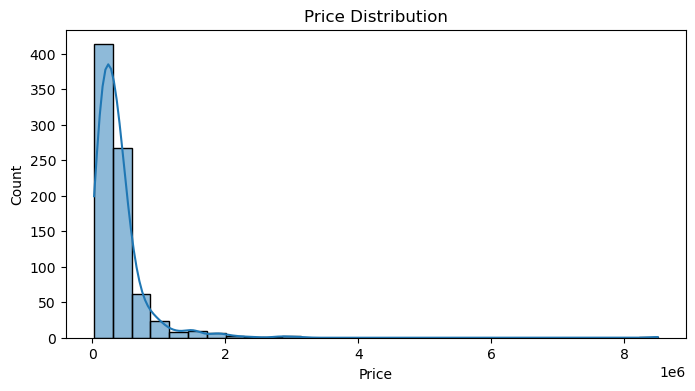

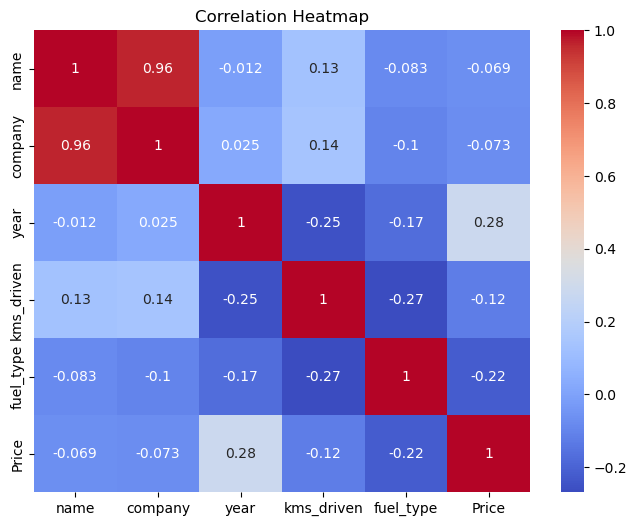


🚀 Training Model...
✅ Model Training Completed!
📊 R2 Score: -0.0681
📉 Mean Squared Error: 143879333306.8801

💾 Model saved as car_price_model.pkl
💾 Scaler saved as scaler.pkl

🎯 Everything Done! Now you can run:  streamlit run app.py


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pickle

# -------------------------------
# Step 1: Data Loading & Cleaning
# -------------------------------

class CarPriceDataset:
    def __init__(self, filepath):
        self.filepath = filepath
        self.df = None

    def load_data(self):
        self.df = pd.read_csv(self.filepath)
        print("📂 Dataset Loaded Successfully!")
        print(f"Total Rows: {self.df.shape[0]}, Total Columns: {self.df.shape[1]}")
        return self.df

    def initial_info(self):
        print("\n📊 Dataset Info:")
        print(self.df.info())
        print("\n🔎 First 5 Rows:")
        print(self.df.head())


class DataPreprocessor:
    def __init__(self, df):
        self.df = df.copy()
        self.scaler = StandardScaler()

    def clean_data(self):
        print("\n🧹 Cleaning Data...")
        self.df['year'] = pd.to_numeric(self.df['year'], errors='coerce')
        self.df['Price'] = self.df['Price'].astype(str).str.replace(',', '', regex=False).str.replace('₹', '', regex=False)
        self.df['Price'] = pd.to_numeric(self.df['Price'], errors='coerce')
        self.df['kms_driven'] = self.df['kms_driven'].astype(str).str.replace(' kms', '', regex=False).str.replace(',', '', regex=False)
        self.df['kms_driven'] = pd.to_numeric(self.df['kms_driven'], errors='coerce')
        print("✅ Cleaning Done!")
        return self.df

    def handle_nulls_duplicates(self):
        before = self.df.shape[0]
        self.df.drop_duplicates(inplace=True)
        after = self.df.shape[0]
        print(f"\n🗑 Removed {before - after} duplicate rows")
        self.df.fillna(self.df.mean(numeric_only=True), inplace=True)
        for col in self.df.select_dtypes(include=['object']).columns:
            self.df[col].fillna(self.df[col].mode()[0], inplace=True)
        print("✅ Null Values Handled!")
        return self.df

    def encode_and_scale(self):
        print("\n🔢 Encoding & Scaling...")
        for col in self.df.select_dtypes(include=['object']).columns:
            self.df[col] = self.df[col].astype('category').cat.codes

        X = self.df.drop("Price", axis=1)
        y = self.df["Price"]

        X_scaled = pd.DataFrame(self.scaler.fit_transform(X), columns=X.columns)

        self.df = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

        print("✅ Encoding & Scaling Done!")
        return self.df, self.scaler

    def get_dataframe(self):
        return self.df


# -------------------------------
# Step 2: EDA (Optional Visuals)
# -------------------------------
def perform_eda(df):
    print("\n📊 Performing EDA...")
    plt.figure(figsize=(8, 4))
    sns.histplot(df['Price'], bins=30, kde=True)
    plt.title("Price Distribution")
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()


# -------------------------------
# Step 3: Model Training
# -------------------------------

class CarPriceModel:
    def __init__(self, df):
        self.df = df
        self.model = SVR(kernel='rbf')

    def train(self):
        print("\n🚀 Training Model...")
        X = self.df.drop('Price', axis=1)
        y = self.df['Price']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        self.model.fit(X_train, y_train)
        y_pred = self.model.predict(X_test)

        print("✅ Model Training Completed!")
        print(f"📊 R2 Score: {r2_score(y_test, y_pred):.4f}")
        print(f"📉 Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
        return self.model
    # After training model
feature_order = final_df.drop("Price", axis=1).columns.tolist()

with open("feature_order.pkl", "wb") as f:
    pickle.dump(feature_order, f)

print(f"📂 Feature order saved: {feature_order}")


# -------------------------------
# Step 4: Save Model & Scaler
# -------------------------------

class SaveModel:
    def __init__(self, model, scaler, model_file="car_price_model.pkl", scaler_file="scaler.pkl"):
        self.model = model
        self.scaler = scaler
        self.model_file = model_file
        self.scaler_file = scaler_file

    def save(self):
        with open(self.model_file, "wb") as f:
            pickle.dump(self.model, f)
        with open(self.scaler_file, "wb") as f:
            pickle.dump(self.scaler, f)
        print(f"\n💾 Model saved as {self.model_file}")
        print(f"💾 Scaler saved as {self.scaler_file}")


# -------------------------------
# Step 5: Execution Pipeline
# -------------------------------

dataset = CarPriceDataset("quikr_car.csv")
df = dataset.load_data()
dataset.initial_info()

cleaner = DataPreprocessor(df)
cleaner.clean_data()
cleaner.handle_nulls_duplicates()
final_df, scaler = cleaner.encode_and_scale()

perform_eda(final_df)

trainer = CarPriceModel(final_df)
model = trainer.train()

saver = SaveModel(model, scaler)
saver.save()

print("\n🎯 Everything Done! Now you can run:  streamlit run app.py")
